# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from seaborn import load_dataset
%matplotlib inline
plt.rc('figure', figsize = (6,4))

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [3]:
regressao1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
regressao1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.52e-06
Time:                        01:23:04   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_7542/270697068.py:3: RuntimeWarning: invalid value encountered in true_divide
  y = .1*(x/x)


(0.0, 0.505398619388979)

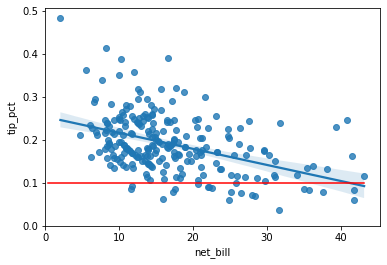

In [4]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*(x/x)
plt.plot(x, y,'-r')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['resid'] = reg.resid #regressão residual

tips


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.62e-13
Time:                        01:23:33   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,resid
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.129741
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.095326
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.020967
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.006784
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.020886
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.119817
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-0.043761
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-0.056708
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-0.083185


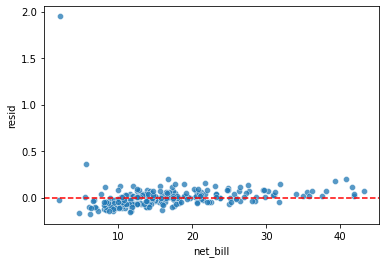

In [6]:

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')


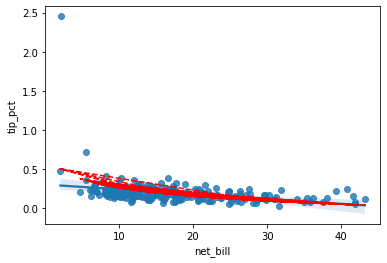

In [7]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [8]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())
tips['resid'] = reg.resid #regressão residual

tips

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.06e-09
Time:                        01:27:08   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,resid
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.116663
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.097375
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.036269
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.023174
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.036906
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.132694
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-0.036894
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-0.040471
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-0.069950


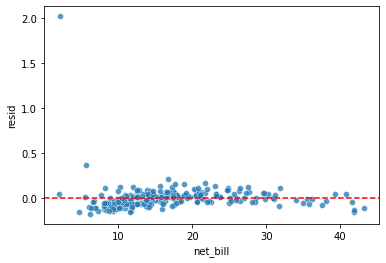

In [9]:

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')


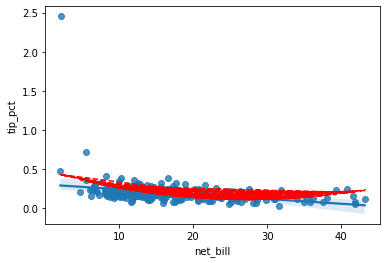

In [10]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           8.27e-16
Time:                        01:29:40   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

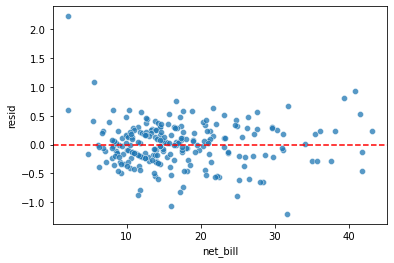

In [11]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg.summary())
tips['resid'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

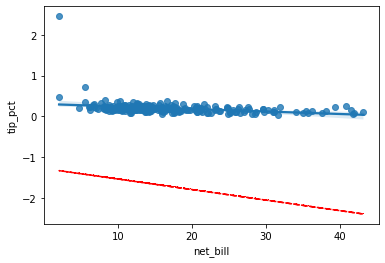

In [12]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [16]:
tips['tip_pct_pred'] = np.exp(reg.fittedvalues)
tips[['tip_pct_pred', 'tip_pct']].corr().iloc[0,1]**2


0.11440988592529767

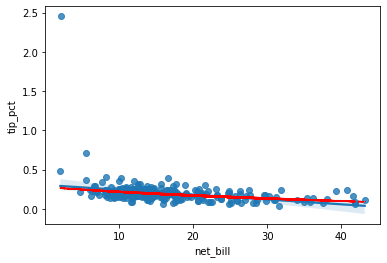

In [18]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['tip_pct_pred'], 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           5.20e-20
Time:                        01:42:34   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

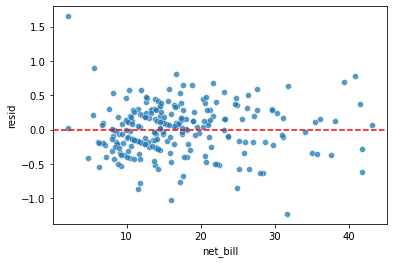

In [19]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['resid'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'resid', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

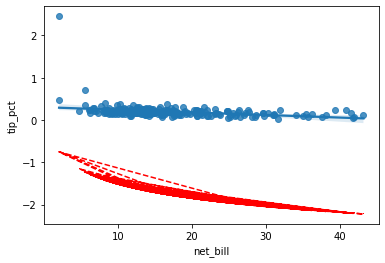

In [20]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [24]:
tips['tip_pct_pred'] = np.exp(reg.fittedvalues)
tips[['tip_pct_pred', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322276

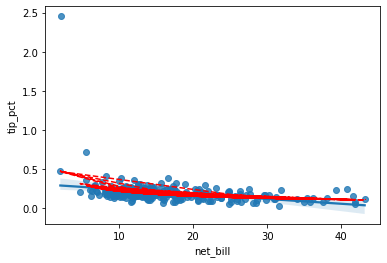

In [25]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['tip_pct_pred'], 'r,--')


###  6. qual modelo resultou no melhor ajuste?

O modelo que resuktou no melhor ajuste foi o do item 4, ou seja, modelo do log do tip_pct em função de net_bill.